# **Customer Segmentation using RFM Analysis by Binning and K-Means Method**

## Business Understanding


**Company Book & Gift**, second largers bookstore company in Europe, that sells various books from any genre has decline sales approximately 10% for 2 month. After make an analysis, Market Team conclude that the marketing initiative that has been created from the company doesnt targeted fit into the right segment. For make a better marketing initiative, Marketing Team should define dan create a robust segmented customer layer to create initiative of marketing campaign. Another issue is the resource that want to be allocated is limited, so it should be spread efficiently. Company Book & Gift must recognizes customers behavior that have the same needs, preferences, or purchasing behaviors.

The Book & Gift is a well-established retail business specializing in selling books, e-books, and related products. With the rapid evolution of the retail industry and changing consumer preferences, the company recognizes the need to better understand its customer base and tailor its marketing strategies accordingly. To achieve this goal, the company has decided to embark on a customer segmentation projects.

The customer segmentation project will involve analyzing historical customer data, transaction records, and customer interactions to identify distinct customer segments. These segments will be used to refine marketing strategies, enhance customer engagement, and ultimately drive business growth. By undertaking this customer segmentation project, the Bookstore Company aims to enhance its customer relationships, increase sales, and optimize its marketing efforts. With a deeper understanding of its customer base, the company can adapt to changing market dynamics and provide a more personalized shopping experience, ultimately securing its position in the competitive retail landscape.
The input of this problem is ineffective marketing targeting. So we will to use Binning & K-Means method to create market segmentation. Hopefully, those market segment can be implement specific marketing strategies to increase sales.


### **Business Objective**

•	**Increase Sales** <br>
Increase overall sales by targeting specific customer segments with tailored marketing strategies and product recommendations.<br>

•	**Improve Customer Experience** <br>
Enhance the shopping experience by offering personalized recommendations and promotions.<br>

•	**Optimize Inventory** <br>
Improve inventory management by stocking products that align with the preferences of different customer segments.<br>

•	**Reduce Marketing Costs** <br>
Reduce marketing expenses by focusing resources on high-potential customer segments.<br>



## **C.	Deliverables**
•	**Customer Segmentation Report**: <br>
Detailed analysis of customer segments, including profiles and recommendations.<br>

•	**Implementation Plans**: <br>
A roadmap for executing the segmented marketing strategies..<br>

•	**Training**: <br>
Training sessions for relevant teams on how to use customer segments effectively.<br>



### **Business Questions / Problem Statements**
---

- How can we effectively segment our customer base to better understand customer behavior and implement targeted marketing strategies?

## **Related Works**
•	The Customer Base Audit – Peter Fader <br>

•	Customer Analytics for Dummies – Wiley (2015) by Jeff Sauro<br>

•	Modeling Markets – by Peter S.H Leeflang, Jaap E. Wieringa, Tammo H.A. Bijmolt, Koen H. Pauwels<br>

•	Market Segmentation Analysis (2018) – by Sara Dolnicar, Bettina Grun, Friedrich Leisch<br>

•	Database Marketing (2008) – by Robert C. Blattberg, Byung-Do Kim, Scott A. Neslin<br>

•	Research on K-Value Selection Method of K-Means Clustering Algorithm (2019) – by Yuan, C. & Yang, H<br>

•	Lecture Notes 11 Clustering – Carnegie Mellon University – by Amit K Verma, Anthony (Tony) Rollet<br>

•	Lecture Notes Clustering – Universitat Heidelberg by Erich Schubert<br>

•	Visualizing RFM Segmetation by Ron Kohavi and Rajesh Parekh<br>


### **Define the Problem**
---

1. **What are the inputs?** Purchasing behavior records: recency, frequency, and monetary.
2. **What are the outputs?** Customer segments
3. **What do we do with the segmentation?** Marketing team will treat each segment based on their characteristics, e.g. create a loyalty coupon

### **Modelling Task**
---
- **Task:**
  - Clustering
- **Model used:**
  - Ranking based
  - K-means
- **Cluster Evaluation:**
  - Elbow method

## 2. Workflow Analysis

### Machine Learning Workflow
---

### 1. Importing Data to Python
    * Data validation
### 2. Exploratory Data Analysis
    * Data exploration
### 3. Data Preprocessing
    * Missing value handling, feature engineering, and normalization
### 4. Modeling
    * Finding best model
### 5. Recommendation
    * Business recommendation and Actionable insights

## 3. Data Description
---

- `Customer ID`: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. <br><br>
- `Invoice`: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.
<br><br>
- `Revenue_Total`: Total revenue that generated from unique customer from first buy. <br><br>
- `N_Purchases`: The quantities of each product (item) per transaction. Numeric. <br><br>
- `Purchase_DATE`: Purchase Date and time. Numeric, the day when each transaction was generated. <br><br>
- `Purchase_VALUE`: Unit price. Numeric, Product price per unit in sterling. <br><br>
- `Pay_Method`: Method for purchase the item (Cards, PayPal, Digital Wallets).  <br><br>
- `Time_Spent`: Average time of customer on website (in second). <br><br>
- `Browser`: Chrome, Safari, Edge, Other. <br><br>
- `Newsletter`: Subscribed or Not Subscribed <br><br>
- `Voucher`: Used or Not Used <br><br>

### **Preprocessed data:**

- **Frequency** <br>
It measures how often a customer engages with the business. Frequency = Count number of transactions customer

- **Tenure** <br>
It refers the ‘age’ of the customers being our customer. Tenure = First cust. purchase date - last cust. purchase date

- **Recency** <br>
It measures how recently a customer has engaged with the business. Recency = Reference date (e.g., today) - Customer last purchase date

- **Monetary** <br>
It refers to the total monetary value of a customer's transactions or purchases. Monetary = Product Price * Quantity Order

## Import Data

In [2]:
# Import library that needs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
retail_df = pd.read_csv("../data/online_retail.csv")

In [4]:
# Create function to read dataframe

def load_dataset(data_path):
    """
    Function to read dataset with csv extension, check either have any duplicate data.

    Parameters:
    -----------
    data_path : str
        Path for load the data

    Returns
    -------
    retail_df : pandas DataFrame
        Retail dataset in dataframe type
    """
    # Load dataset
    retail_df = pd.read_csv(data_path, low_memory=False)

    # Drop any duplicate data
    retail_df = retail_df.drop_duplicates()

    # Show the shape of data
    print("Shape of data :", retail_df.shape)

    return retail_df

In [5]:
# Load data
data_path = "../data/online_retail.csv"

retail_df = load_dataset(data_path)

Shape of data : (65796, 11)


In [6]:
# Check the data using .head()
retail_df.head()

,Customer_ID,Invoice,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,NaN,489548,45.3,2,22.06.21,24.915,Cards,885,Chrome,Not Subsribed,Not Used
1,NaN,489549,36.2,3,10.12.21,2.896,Paypal,656,Chrome,Not Subsribed,Used
2,NaN,489550,10.6,1,14.03.21,10.600,Digital Wallets,761,Chrome,Subsribed,Not Used
3,NaN,489551,54.1,5,25.10.21,43.280,Cards,906,Chrome,Subsribed,Not Used
4,NaN,489552,56.9,1,14.09.21,56.900,Cards,605,Chrome,Subsribed,Not Used


In [7]:
# Check if there's any duplicate value
retail_df.duplicated().sum()

0

In [8]:
# Check data types for all columns
retail_df.dtypes

Customer_ID       float64
Invoice             int64
Revenue_Total     float64
N_Purchases         int64
Purchase_DATE      object
Purchase_VALUE    float64
Pay_Method         object
Time_Spent          int64
Browser            object
Newsletter         object
Voucher            object
dtype: object

In [9]:
# Change the datatype of "Purchase_DATE" from object to timeseries.
# Replace "." char to "-"
retail_df["Purchase_DATE"] = retail_df["Purchase_DATE"].str.replace(".","-")

# Replace `21` in 2 last characters to `2021`
retail_df["Purchase_DATE"] = retail_df["Purchase_DATE"].str[:-2] + '20' + retail_df["Purchase_DATE"].str[-2:]

# Typecasting format of column `Purchase_DATE` to datetime
retail_df["Purchase_DATE"] = pd.to_datetime(retail_df["Purchase_DATE"],infer_datetime_format=True)

C:\Users\Axel\AppData\Local\Temp\ipykernel_24512\3273906813.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  retail_df["Purchase_DATE"] = retail_df["Purchase_DATE"].str.replace(".","-")


In [10]:
# Validate of "Purchase_DATE" column data types
retail_df.dtypes

Customer_ID              float64
Invoice                    int64
Revenue_Total            float64
N_Purchases                int64
Purchase_DATE     datetime64[ns]
Purchase_VALUE           float64
Pay_Method                object
Time_Spent                 int64
Browser                   object
Newsletter                object
Voucher                   object
dtype: object

# 4. Exporatory Data Analysis

In [11]:
# Create the copy of data so the data wouldn't be overwritten
retail_eda = retail_df.copy()

# Validate the shape of data
print("Shape of `retail_df`:", retail_df.shape)
print("Shape of `retail_eda`:", retail_eda.shape)

Shape of `retail_df`: (65796, 11)
Shape of `retail_eda`: (65796, 11)


In [12]:
# Check statistical descriptive of dataset (For numerical columns)
retail_eda.describe()

,Customer_ID,Invoice,Revenue_Total,N_Purchases,Purchase_VALUE,Time_Spent
count,65399.000000,65796.000000,65796.000000,65796.000000,65796.000000,65796.000000
mean,504930.113656,522445.500000,27.732935,3.992477,15.968699,598.925603
std,205.567125,18993.813493,14.941878,2.004370,13.229295,277.833635
min,504308.000000,489548.000000,0.500000,1.000000,0.005000,120.000000
25%,504810.000000,505996.750000,15.300000,2.000000,4.819750,358.000000
50%,504979.000000,522445.500000,30.100000,4.000000,12.640000,598.000000
75%,505096.000000,538894.250000,37.600000,6.000000,24.752000,840.000000
max,505188.000000,555343.000000,59.900000,7.000000,59.900000,1080.000000


- All values is positive, which is rational because neither of value can be negative
- There are potential outlier in `Revenue_Total`, `Purchase_Value`, and `Time_Spent`. Need further analysis to proof 

In [13]:
# Check possibilities of missing values
retail_eda.isna().sum()

Customer_ID       397
Invoice             0
Revenue_Total       0
N_Purchases         0
Purchase_DATE       0
Purchase_VALUE      0
Pay_Method          0
Time_Spent          0
Browser             0
Newsletter          0
Voucher             0
dtype: int64

`Column_ID` columns has some NaN value. Check the column first to handling missing values

In [14]:
retail_eda[retail_eda['Customer_ID'].isna()]

,Customer_ID,Invoice,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,NaN,489548,45.3,2,2021-06-22,24.915,Cards,885,Chrome,Not Subsribed,Not Used
1,NaN,489549,36.2,3,2021-12-10,2.896,Paypal,656,Chrome,Not Subsribed,Used
2,NaN,489550,10.6,1,2021-03-14,10.600,Digital Wallets,761,Chrome,Subsribed,Not Used
3,NaN,489551,54.1,5,2021-10-25,43.280,Cards,906,Chrome,Subsribed,Not Used
4,NaN,489552,56.9,1,2021-09-14,56.900,Cards,605,Chrome,Subsribed,Not Used
...,...,...,...,...,...,...,...,...,...,...,...
5952,NaN,495500,39.2,7,2021-03-23,31.752,Paypal,217,Safari,Not Subsribed,Used
5953,NaN,495501,16.8,6,2021-12-23,5.544,Others,548,Chrome,Not Subsribed,Not Used
5954,NaN,495502,38.5,2,2021-12-14,1.925,Digital Wallets,974,Safari,Not Subsribed,Not Used
5955,NaN,495503,15.7,2,2021-11-11,7.536,Cards,239,Edge,Not Subsribed,Used


- For create RFM Analysis, we should aggregate data by each transaction by `Customer_ID`
- Which mean we should drop this missing values

In [15]:
# Drop the missing record for `Customer_ID`
# Before dropping the missing values
print('Shape before dropping missing values:', retail_eda.shape)

# Drop NaN values
retail_eda = retail_eda[~retail_eda['Customer_ID'].isna()]

print('Shape after dropping missing values:', retail_eda.shape)

Shape before dropping missing values: (65796, 11)
Shape after dropping missing values: (65399, 11)


In [16]:
# Validation of NaN values
retail_eda.isna().sum()

Customer_ID       0
Invoice           0
Revenue_Total     0
N_Purchases       0
Purchase_DATE     0
Purchase_VALUE    0
Pay_Method        0
Time_Spent        0
Browser           0
Newsletter        0
Voucher           0
dtype: int64

In [17]:
# Check for Invoice Columns
retail_eda['Invoice'].value_counts()

489634    1
533550    1
533537    1
533538    1
533539    1
         ..
511749    1
511750    1
511751    1
511752    1
555343    1
Name: Invoice, Length: 65399, dtype: int64

- There are no duplicate value in `Invoice`

In [18]:
# Check total unique Customer_ID
len(set(retail_eda['Customer_ID']))

881

In [19]:
# Check First and Last Transaction in Retail
print(f'Date of First Transaction is :', {str(retail_eda["Purchase_DATE"].min())})
print(f'Date of Last Transaction is :', {str(retail_eda["Purchase_DATE"].max())})

Date of First Transaction is : {'2021-01-01 00:00:00'}
Date of Last Transaction is : {'2022-01-01 00:00:00'}


- From analysis above, we conclude that data consist of 1 years transaction

## Create RFM Features

In [24]:
# Set the last trasaction data to became the reference date
last_trans_date = pd.to_datetime('2022-01-01')

last_trans_date

Timestamp('2022-01-01 00:00:00')

- **Recency** (R) <br>
Recency refers to the time elapsed since a customer's last interaction or transaction with a company.
It measures **how recently a customer has engaged** with the business

- **Frequency** (F)<br>
Frequency represents the number of transaction occurs.
It measures how often a customer engages with the business.

- **Monetary** (M)<br>
Monetary refers to the total monetary value of a customer's transactions or purchases.

- **Tenure** (T) <br>
The length of time a customer remains a customer **until the latest date**


<br>

In [25]:
# Create function to make RFM Analysis
def recency_value(x):
    """"""
    return (last_trans_date - x.max()).days

def tenure_value(x):
    """"""
    return (x.max() - x.min()).days

def frequency_value(x):
    """"""
    return len(set(x))

def retrieve_rfmts(df):
    """"""
    # Generate value of sales transaction --> Sales = N_Purchases x Purchase_VALUE
    df["Sales"] = df["N_Purchases"] * df["Purchase_VALUE"]

    # Aggregate by 'Customer_ID' to retrieve RFM + TS
    dict_agg_data = {
        'Purchase_DATE' : [recency_value, tenure_value],
        'Invoice' : frequency_value,
        'Sales' : 'sum'
    }

    rfm_ts_data = df.groupby('Customer_ID').agg(dict_agg_data)

    # Change name of column
    rfm_ts_data.columns = ['Recency', 'Tenure', 'Frequency', 'Monetary']

    # Change type of index
    rfm_ts_data.index = rfm_ts_data.index.astype('int')

    return rfm_ts_data

In [26]:
rfm_data_eda = retrieve_rfmts(df = retail_eda)

# Validate the output
# Rows of rfm_data_eda == unique number of Customer_ID
print('Shape of RFM datashape :', rfm_data_eda.shape)
assert rfm_data_eda.shape[0] == len(set(retail_eda['Customer_ID']))

Shape of RFM datashape : (881, 4)


In [27]:
# Do sanity check
rfm_data_eda.head()

,Recency,Tenure,Frequency,Monetary
Customer_ID,,,,
504308,1,362,450,25499.332
504309,40,322,10,892.388
504310,4,288,8,682.436
504311,33,290,9,736.446
504312,11,220,5,54.155


In [28]:
# Check data description of `rfm_data_eda`
rfm_data_eda.describe()

,Recency,Tenure,Frequency,Monetary
count,881.000000,881.000000,881.000000,881.000000
mean,10.518729,343.486947,74.232690,4298.080144
std,19.044205,31.567390,57.813762,3370.302997
min,0.000000,114.000000,3.000000,54.155000
25%,1.000000,340.000000,23.000000,1331.508000
50%,4.000000,356.000000,59.000000,3467.950000
75%,12.000000,361.000000,118.000000,6848.626000
max,199.000000,365.000000,450.000000,25499.332000


- Based on EDA on statistical descriptive in `rfm_data_eda`, there is no negative value in all columns

#### Check for `Frequency` & `Tenure`

In [29]:
# Check for frequency == 1 in rfm_data_eda
rfm_data_eda[rfm_data_eda['Frequency'] == 1]

,Recency,Tenure,Frequency,Monetary
Customer_ID,,,,


- There are no one on time purchaser
- Check customer tenure = 0 
- We want to know is there any customer with tenure = 0 and frequency > 1

In [30]:
# Check for tenure == 0 in rfm_data_eda
rfm_data_eda[rfm_data_eda['Tenure'] == 0]

,Recency,Tenure,Frequency,Monetary
Customer_ID,,,,


- We can conclude that there are no one customer

- Check for `Monetary`

In [31]:
# Monetary
rfm_data_eda[rfm_data_eda['Frequency'] == 1]['Monetary'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Monetary, dtype: float64

**Summary**
- There are no one customer who be the one-time purchaser on data

#### Data Distribution

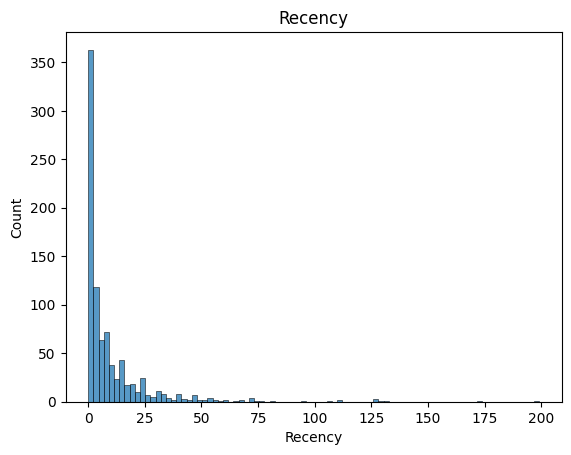

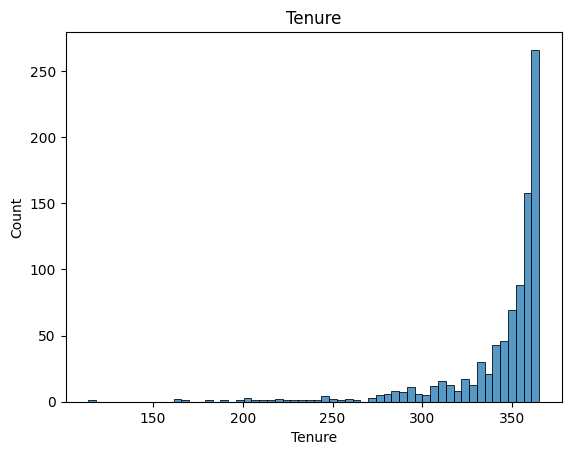

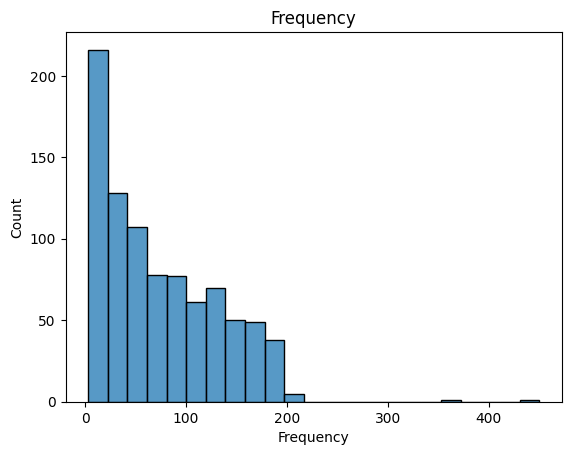

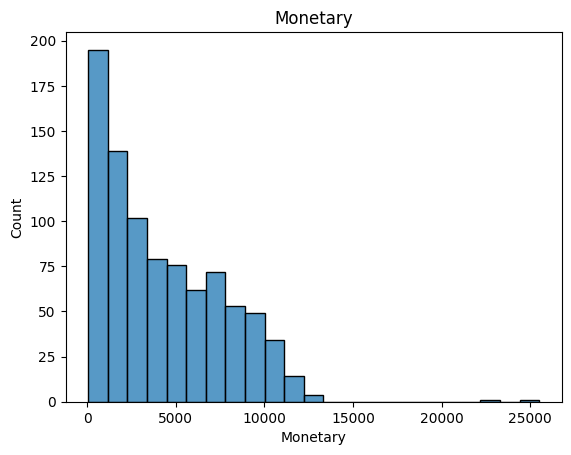

In [32]:
# Try to plot the distribution
for col in rfm_data_eda.columns:
    x = rfm_data_eda[col]
    sns.histplot(x)
    plt.title(col)
    plt.show()

**Summary**
- The distribution is skew for all columns. Try further analysis to determine is there any outliers
- Use IQR method to determine

In [34]:
# Drop ouliers
def drop_outlier(df, columns):
    """
    Function to remove record that exceed the outliers value determine by IQR

    Parameters
    ----------
    df : pandas DataFrame
        Sample of data

    columns : list
        Name of columns that want to drop the outliers

    Returns
    -------
    clean_df : pandas DataFrame
        Data that has been drop outliers
    """
    # Copy dataframe
    clean_df = df.copy()

    # Iteration for all columns and record
    for column in columns:
        # Calculate value of IQR
        q1, q3 = np.quantile(clean_df[column], q=[0.25, 0.75])
        iqr = q3 - q1
        upper_bond = q3 + 1.5*iqr 
        lower_bond = q1 - 1.5*iqr

        # Filter data based on iqr
        data_condition_1 = clean_df[column] <= upper_bond
        data_condition_2 = clean_df[column] >= lower_bond
        clean_df = clean_df[data_condition_1&data_condition_2]

    return clean_df


In [35]:
# Drop the outliers by function
rfm_data_eda = drop_outlier(df = rfm_data_eda,
                            columns = ['Recency','Tenure','Frequency','Monetary'])

# Data validation
print('Shape of EDA data :', rfm_data_eda.shape)
rfm_data_eda.describe()

Shape of EDA data : (733, 4)


,Recency,Tenure,Frequency,Monetary
count,733.000000,733.000000,733.000000,733.000000
mean,5.038199,354.787176,85.377899,4944.521000
std,5.841828,9.549325,53.359748,3102.858155
min,0.000000,325.000000,7.000000,419.437000
25%,1.000000,350.000000,39.000000,2203.387000
50%,3.000000,358.000000,77.000000,4443.646000
75%,7.000000,362.000000,128.000000,7399.816000
max,28.000000,365.000000,210.000000,13037.662000


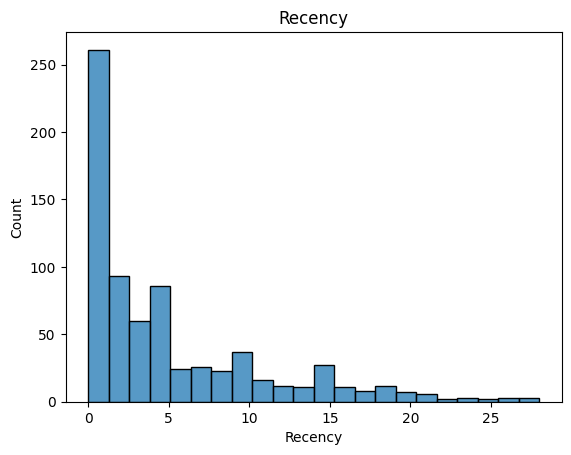

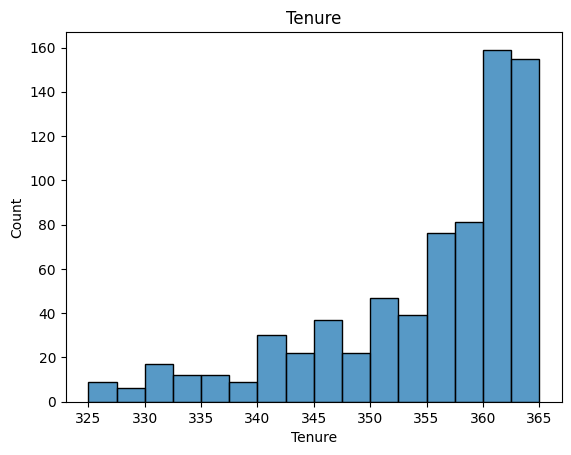

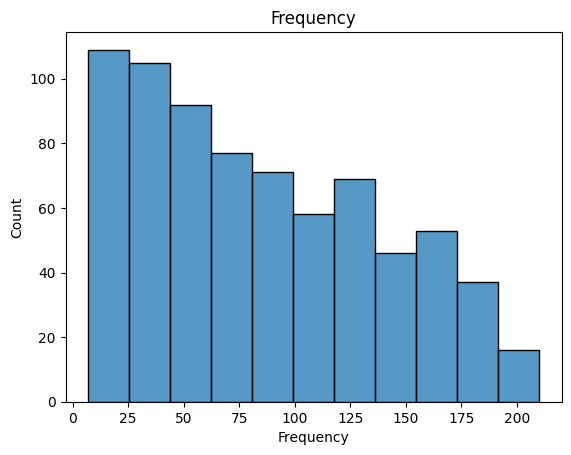

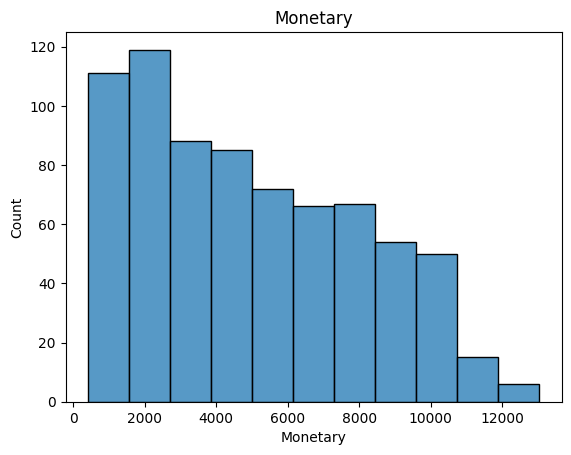

In [36]:
# Try to plot the distribution
for col in rfm_data_eda.columns:
    x = rfm_data_eda[col]
    sns.histplot(x)
    plt.title(col)
    plt.show()

# 5. Data Preprocessing

The preprocess data is following the plan from previous EDA

1. Remove missing value from `Customer_ID`
2. Convert data to RFM + TS data
3. Remove `Frequency < 2`
4. Remove `Recency`, `Tenure`, `Monetary`, `Frequency` outlier
5. Normalize the data (using Min-Max)

#### Preprocess Raw Data

In [37]:
# Create function to preprocess data
def preprocess_dataraw(df):
    """
    Function to preprocess data to RFM data

    Parameters
    ----------
    df : pandas DataFrame
        Raw data
    
    Returns
    -------
    rfm_data : pandas DataFrame
        The RFM dataset
    """
    # Drop missing values in `Customer_ID`
    raw_data = df[~df['Customer_ID'].isna()]

    # Generate RFM dataset
    rfm_data = retrieve_rfmts(df = raw_data)

    # Create RFM data validation
    print("Shape of data shape :", rfm_data.shape)
    assert rfm_data.shape[0] == len(set(raw_data['Customer_ID']))

    return rfm_data

In [38]:
# Generate RFM DataFrame
rfm_data = preprocess_dataraw(df = retail_eda)

rfm_data.head()

Shape of data shape : (881, 4)


,Recency,Tenure,Frequency,Monetary
Customer_ID,,,,
504308,1,362,450,25499.332
504309,40,322,10,892.388
504310,4,288,8,682.436
504311,33,290,9,736.446
504312,11,220,5,54.155


#### Preprocess RFM Dataset

In [39]:
def preprocess_rfm_data(rfm_data):
    """
    Function to preprocecc RFM dataset

    Parameters
    ----------
    rfm_data : pandas DataFrame
        Sample of RFM data

    Returns
    -------
    clean_df : pandas DataFrame
        RFM DataFrame
    """
    # Filter frequency
    freq_data = rfm_data[rfm_data['Frequency'] >= 2]

    # Drop outliers
    clean_df = drop_outlier(df = freq_data,
                            columns = ['Recency','Tenure','Frequency','Monetary'])

    # Filter data
    clean_df = clean_df[['Recency','Frequency','Monetary']] 

    # Data Validation
    print("Shape of data:", clean_df.shape)

    return clean_df

In [40]:
# Generate the clean RFM data
rfm_clean_data = preprocess_rfm_data(rfm_data = rfm_data)

rfm_clean_data.describe()

Shape of data: (733, 3)


,Recency,Frequency,Monetary
count,733.000000,733.000000,733.000000
mean,5.038199,85.377899,4944.521000
std,5.841828,53.359748,3102.858155
min,0.000000,7.000000,419.437000
25%,1.000000,39.000000,2203.387000
50%,3.000000,77.000000,4443.646000
75%,7.000000,128.000000,7399.816000
max,28.000000,210.000000,13037.662000


- Outliers has been removed

#### Normalize Data

|

In [41]:
# Fit and transfrom using min-max data because the data distribution isn't normal
from sklearn.preprocessing import MinMaxScaler

def fit_scaler(df):
    """
    Function to fit data into min-max scaler

    Parameters
    ----------
    df : pandas DataFrame
        Sample of RFM Dataset

    Returns
    -------
    scaler : object
        Using min-max scaler
    """
    # Fit scaler to data
    scaler = MinMaxScaler()
    scaler.fit(df)

    return scaler

def transform_scaler(df, scaler):
    """
    Function to transform data into min-max scaler

    Parameters
    ----------
    df : pandas DataFrame
        Sample of RFM Dataset

    scaler : object
        Using min-max scaler

    Returns
    -------
    clean_df : pandas DataFrame
        Data that has been transform

    """
    # Transfrom with scaler
    clean_df = pd.DataFrame(scaler.transform(df))
    clean_df.index = df.index
    clean_df.columns = df.columns

    # Data Validation
    print("Shape of data :", df.shape)

    return clean_df

In [42]:
# Fit scaler to dataset
scaler = fit_scaler(df = rfm_clean_data)

# Transform data
rfm_data_scaled = transform_scaler(df = rfm_clean_data,
                                    scaler = scaler)

rfm_data_scaled.head()

Shape of data : (733, 3)


,Recency,Frequency,Monetary
Customer_ID,,,
504316,0.892857,0.009852,0.006133
504318,0.321429,0.019704,0.021071
504320,0.607143,0.009852,0.036387
504330,0.214286,0.004926,0.009863
504333,0.500000,0.019704,0.038331


In [43]:
rfm_data_scaled.describe()

,Recency,Frequency,Monetary
count,733.000000,733.000000,733.000000
mean,0.179936,0.386098,0.358615
std,0.208637,0.262856,0.245903
min,0.000000,0.000000,0.000000
25%,0.035714,0.157635,0.141379
50%,0.107143,0.344828,0.318920
75%,0.250000,0.596059,0.553198
max,1.000000,1.000000,1.000000


#### Create Pipeline for Preprocessing Data

In [44]:
def preprocess_data(df, scaler=None):
    """
    Pipeline function to preprocess data

    Parameters
    ----------
    df : pandas DataFrame
        Raw of dataset

    scaler : object, default=None
        Min-max scaler for scaling data

    Returns
    -------
    clean_df : pandas DataFrame
        The clean dataframe
    """
    # Retrieve the RFM data
    rfm_data = preprocess_dataraw(df = df)

    # Retrieve the clean dataset
    rfm_clean_data = preprocess_rfm_data(rfm_data = rfm_data)

    # Normalize data
    if scaler is None:
        # Create scaler
        scaler = fit_scaler(df = rfm_clean_data)

    clean_df = transform_scaler(df = rfm_clean_data,
                                scaler = scaler)

    # Data Validation
    print('Shape of clean data :', clean_df.shape)

    return clean_df, scaler


In [45]:
clean_df, scaler = preprocess_data(df = retail_df)

C:\Users\Axel\AppData\Local\Temp\ipykernel_17856\1659154623.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sales"] = df["N_Purchases"] * df["Purchase_VALUE"]


Shape of data shape : (881, 4)
Shape of data: (733, 3)
Shape of data : (733, 3)
Shape of clean data : (733, 3)


In [46]:
clean_df.head()

,Recency,Frequency,Monetary
Customer_ID,,,
504316,0.892857,0.009852,0.006133
504318,0.321429,0.019704,0.021071
504320,0.607143,0.009852,0.036387
504330,0.214286,0.004926,0.009863
504333,0.500000,0.019704,0.038331


In [47]:
clean_df.describe()

,Recency,Frequency,Monetary
count,733.000000,733.000000,733.000000
mean,0.179936,0.386098,0.358615
std,0.208637,0.262856,0.245903
min,0.000000,0.000000,0.000000
25%,0.035714,0.157635,0.141379
50%,0.107143,0.344828,0.318920
75%,0.250000,0.596059,0.553198
max,1.000000,1.000000,1.000000


# 6 Clustering

**Approch** 

In this study, we will used to approach:
- Ranking Method
- K-Means clustering

#### Ranking Method

In [48]:
# Copy dataset firsts
df_bin = clean_df.copy()

We should determine how many bins that want to be plotted in data. The numbers of bin determine by the business resource and needs to treat the cluster. This method is performed by Arthur Hughes that each bin of the three RFM attributes independently into **five** equal bins 

In [49]:
def rfm_binning(df):
    """
    Function to devided the data into several binning and ranking the bin

    Parameters
    ---------
    df : pandas DataFrame
        Input to binning method (DataFrame)

    Returns
    -------
    df : pandas DataFrame
        Output of binning method
    """
    # Calculate the quantile of each variable 
    quant = df.quantile(q=[0.2,0.4,0.6,0.8])

    # Create bin base on variable
    r_bins = [-np.inf] + list(quant['Recency']) + [np.inf]
    f_bins = [-np.inf] + list(quant['Frequency']) + [np.inf]
    m_bins = [-np.inf] + list(quant['Monetary']) + [np.inf]

    # Create label for bins
    labels = [1, 2, 3, 4, 5]

    # Label for Recency (Lower Recency, Higher Ranking)
    labels_r = [5, 4, 3, 2, 1]

    # Create bin into 5 groups
    df['R_Group'] = pd.cut(df['Recency'], bins=r_bins, labels=labels_r).astype(int)
    df['F_Group'] = pd.cut(df['Frequency'], bins=f_bins, labels=labels).astype(int)
    df['M_Group'] = pd.cut(df['Monetary'], bins=m_bins, labels=labels).astype(int)

    # RFM Score average
    df['RFM_Score'] = np.round((df['R_Group']+df['F_Group']+df['M_Group'])/3,2)

    return df

In [50]:
# Devide data into bin
df_bin = rfm_binning(df_bin)

In [51]:
# Check the data output
df_bin.head()

,Recency,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score
Customer_ID,,,,,,,
504316,0.892857,0.009852,0.006133,1,1,1,1.00
504318,0.321429,0.019704,0.021071,2,1,1,1.33
504320,0.607143,0.009852,0.036387,1,1,1,1.00
504330,0.214286,0.004926,0.009863,2,1,1,1.33
504333,0.500000,0.019704,0.038331,1,1,1,1.00


In [53]:
# Check the data type
df_bin.dtypes

Recency      float64
Frequency    float64
Monetary     float64
R_Group        int32
F_Group        int32
M_Group        int32
RFM_Score    float64
dtype: object

In [54]:
# Check the statistic descriptive stats
df_bin.describe()

,Recency,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score
count,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000
mean,0.179936,0.386098,0.358615,3.130969,2.989086,3.000000,3.040136
std,0.208637,0.262856,0.245903,1.421645,1.418993,1.416144,1.259945
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.035714,0.157635,0.141379,2.000000,2.000000,2.000000,2.000000
50%,0.107143,0.344828,0.318920,3.000000,3.000000,3.000000,3.330000
75%,0.250000,0.596059,0.553198,4.000000,4.000000,4.000000,4.000000
max,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000


- For RFM score 0-1 will be assigned as Dissatisfied Customers
- For RFM score 1-2 will be assigned as Sporadic Shoppers
- For RFM score 2-3 will be assigned as Deal-Driven Shoppers
- For RFM score 3-4 will be assigned as Loyal Consumers
- For RFM score 4-5 will be assigned as Enthusiastic Shoppers

In [56]:
def assign_segmentation(df_rfm):
    """
    Function to assign RFM_Score to each segment

    Parameters
    ----------
    df_rfm : pandas DataFrame
        Binned and preprocessed rfm dataframe
    
    Returns
    -------
    df_rfm : pandas DataFrame
        Rfm dataframe that have been segmented by name
  
    """
    # Assign name of each segment
    labels = ['Dissatisfied Customers', 'Sporadic Shoppers', 
              'Deal-Driven Shoppers', 'Loyal Consumers', 
              'Enthusiastic Shoppers']
    
    df_rfm['Segment'] = pd.cut(df_rfm['RFM_Score'],
                                bins = [0, 1, 2, 3, 4, 5],
                                labels = labels)
    
    return df_rfm

In [57]:
# Create labels bins
df_bin = assign_segmentation(df_bin)

In [61]:
# Check the dataset
df_bin.head()

,Recency,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score,Segment
Customer_ID,,,,,,,,
504316,0.892857,0.009852,0.006133,1,1,1,1.00,Dissatisfied Customers
504318,0.321429,0.019704,0.021071,2,1,1,1.33,Sporadic Shoppers
504320,0.607143,0.009852,0.036387,1,1,1,1.00,Dissatisfied Customers
504330,0.214286,0.004926,0.009863,2,1,1,1.33,Sporadic Shoppers
504333,0.500000,0.019704,0.038331,1,1,1,1.00,Dissatisfied Customers


In [62]:
# Check data bin with RFM score > 4
df_bin[df_bin['RFM_Score'] > 4]

,Recency,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score,Segment
Customer_ID,,,,,,,,
504855,0.000000,0.487685,0.526709,5,4,4,4.33,Enthusiastic Shoppers
504874,0.000000,0.453202,0.410400,5,4,4,4.33,Enthusiastic Shoppers
504891,0.000000,0.458128,0.439347,5,4,4,4.33,Enthusiastic Shoppers
504897,0.000000,0.497537,0.494799,5,4,4,4.33,Enthusiastic Shoppers
504912,0.000000,0.492611,0.413973,5,4,4,4.33,Enthusiastic Shoppers
...,...,...,...,...,...,...,...,...
505183,0.035714,0.822660,0.783538,4,5,5,4.67,Enthusiastic Shoppers
505184,0.142857,0.940887,0.874406,3,5,5,4.33,Enthusiastic Shoppers
505185,0.107143,0.881773,0.867865,3,5,5,4.33,Enthusiastic Shoppers


In [65]:
# Check data bin with RFM score 3 - 4
df_bin[(df_bin['RFM_Score'] > 3) & (df_bin['RFM_Score'] <= 4)]

,Recency,Frequency,Monetary,R_Group,F_Group,M_Group,RFM_Score,Segment
Customer_ID,,,,,,,,
504681,0.000000,0.211823,0.265541,5,2,3,3.33,Loyal Consumers
504700,0.000000,0.221675,0.303658,5,2,3,3.33,Loyal Consumers
504716,0.000000,0.280788,0.271152,5,3,3,3.67,Loyal Consumers
504724,0.071429,0.295567,0.322853,4,3,3,3.33,Loyal Consumers
504737,0.000000,0.266010,0.284167,5,3,3,3.67,Loyal Consumers
...,...,...,...,...,...,...,...,...
505085,0.035714,0.640394,0.568750,4,4,4,4.00,Loyal Consumers
505096,0.178571,0.793103,0.792875,2,5,5,4.00,Loyal Consumers
505111,0.178571,0.699507,0.640639,2,5,5,4.00,Loyal Consumers


- Plot each cluster using boxplot
- Plot each cluster using scatter plot for RFM Variables

In [66]:
# Inverse transfor df_bin
for column in ['Recency', 'Frequency', 'Monetary']:
    # Invers transform X
    X = df_bin[column]

    # Find the index
    index = scaler.feature_names_in_.tolist().index(column)
    maximum_value = scaler.data_max_[index]
    minimum_value = scaler.data_min_[index]

    # Invers Transform
    df_bin[column] = X*(maximum_value-minimum_value)+minimum_value

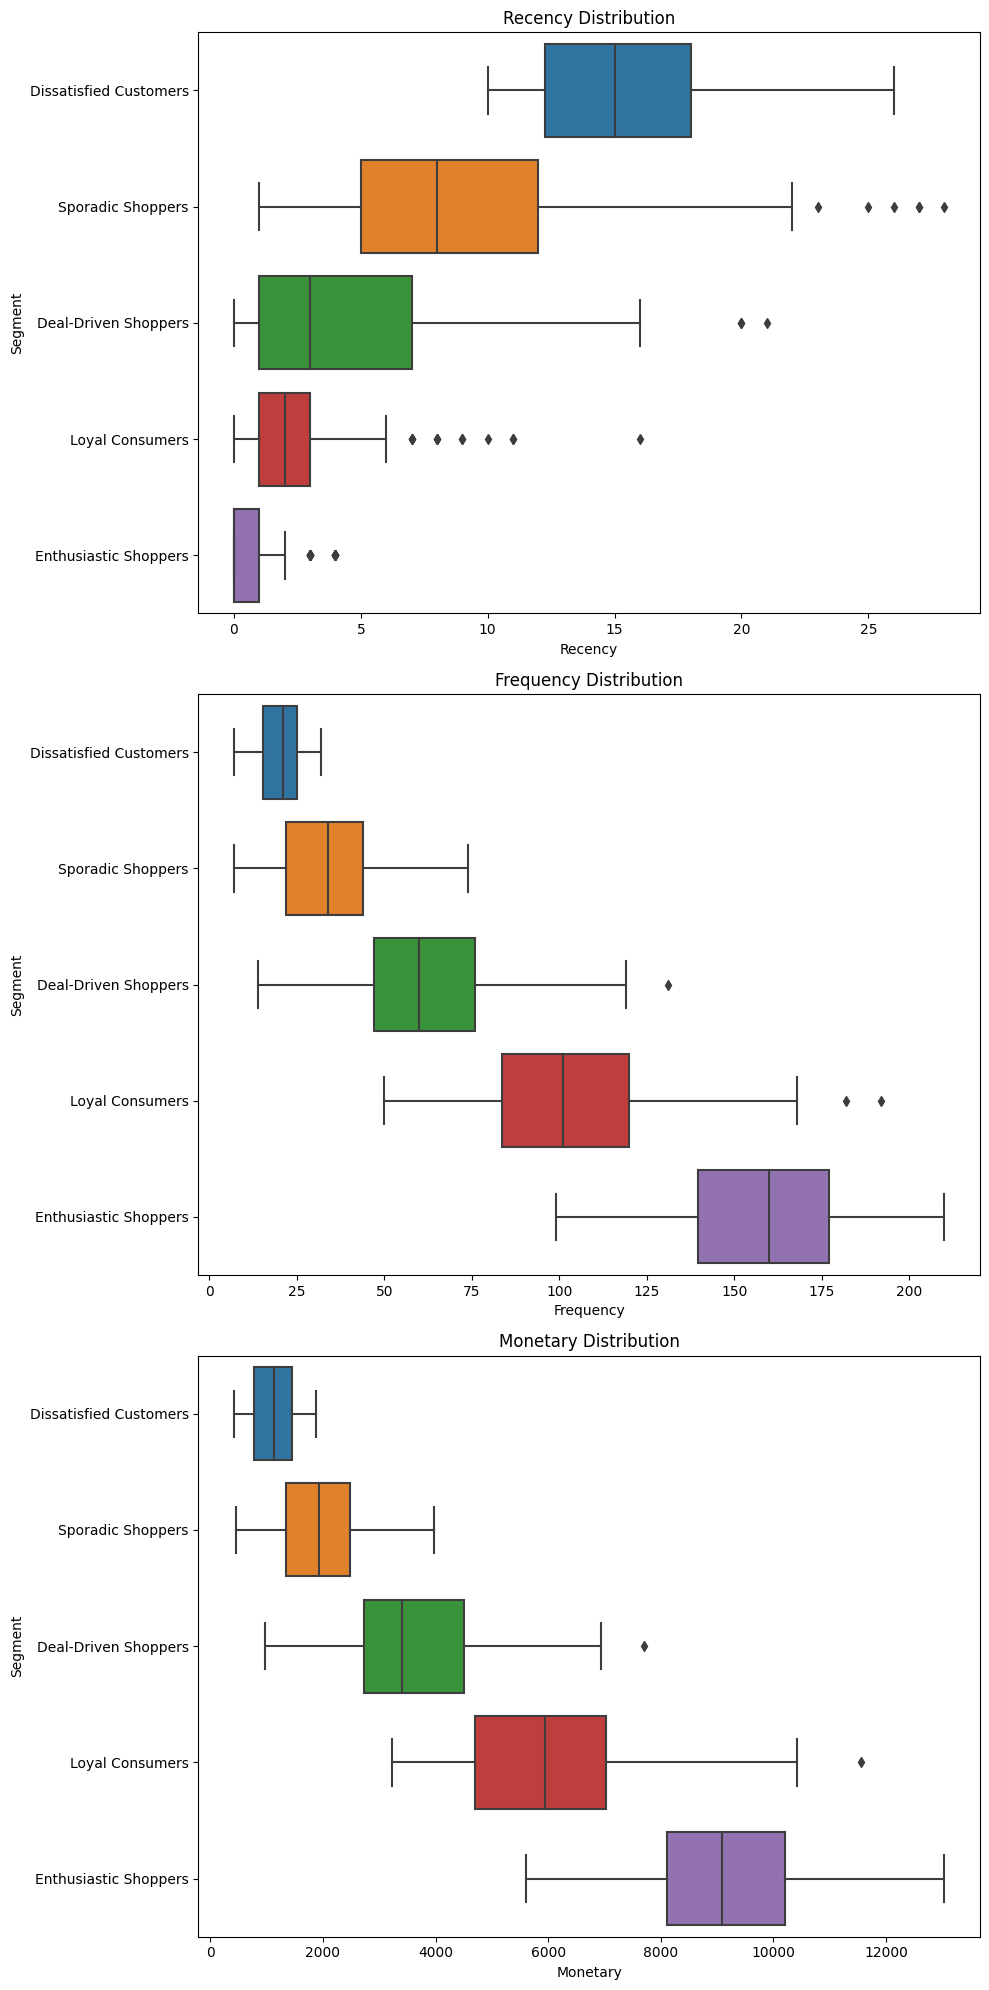

In [68]:
# Plot the boxplot
fig, axes = plt.subplots(nrows = 3, ncols=1, figsize=(10,20))

# Iterate the column
for i, column in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.boxplot(data = df_bin,
                y = 'Segment',
                x = column,
                ax = axes[i])
    
    axes[i].set_title(f'{column} Distribution')

plt.tight_layout()
plt.show()

In [69]:
# Aggregate of mean for each RFM variable
df_bin.groupby('Segment').agg({'Recency':'mean',
                                'Frequency':'mean',
                                'Monetary':'mean'}).round(2)

,Recency,Frequency,Monetary
Segment,,,
Dissatisfied Customers,15.84,19.92,1127.11
Sporadic Shoppers,8.95,33.93,1940.81
Deal-Driven Shoppers,4.64,61.77,3596.96
Loyal Consumers,2.26,102.65,5949.51
Enthusiastic Shoppers,0.85,157.19,9115.70


**Enthusiastic Shoppers** <br>

---

Characteristic: <br>
- low recency,  high frequency, and high monetary value
- Recency: 1 days
- Frequency: 157 transactions
- Monetary: \$ 9116

Marketing initiative: <br>
- Offer devoted account managers or individualized help to address their particular demands.
- Provide tailored product suggestions based on their previous purchases.

**Loyal Customers** <br>

---

Characteristic: <br>
- low recency, medium frequency, and  high monetary value
- Recency: 2 days
- Frequency: 103 transactions
- Monetary: \$ 5950

Marketing initiative: <br>
- Establish a customer loyalty program with tiers of prizes and special advantages.
- Offer rewards for referrals to entice customers to recommend their friends and family to your company.

**Deal-Driven Shoppers** <br>

---

Characteristic: <br>
- medium recency, medium frequency, and  medium monetary
- Recency: 5 days
- Frequency: 62 transactions
- Monetary: \$ 3597

Marketing initiative: <br>
- Encourage people to sample your goods or services by providing them with free trials, demos, or introductory discounts.

**Sporadic Shoppers** <br>

---

Characteristic: <br>
-  high recency, low monetary, and low frequency
- Recency: 9 days
- Frequency: 34 transactions
- Monetary: \$ 1941

Marketing initiative: <br>
- Conduct customer satisfaction surveys to identify and address any issues that may be causing their dissatisfaction
- Use discount promotional campaign to attract them make transaction

**Dissatisfied Customers** <br>

---

Characteristic: <br>
- high recency, low frequency, and low monetary
- Recency: 16 days
- Frequency: 20 transactions
- Monetary: \$ 1127

Marketing initiative: <br>

- Run polls or feedback campaigns to better understand their requirements and preferences.
- Implement a proactive outreach program for customers to address any issues or complaints they may have.

# 7. K-Means Clustering

In [70]:
# Import package for KMeans
from sklearn.cluster import KMeans

In [71]:
df_clean_cluster = clean_df[['Recency', 'Frequency', 'Monetary']]

In [72]:
# Create place holder for inertia (empty list)
inertia = []

# Iteration
for k in range(1, 11):
    # Create k means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # Fit the object
    kmeans.fit(df_clean_cluster)

    # Append the result
    inertia.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method Showing the Optimal K')

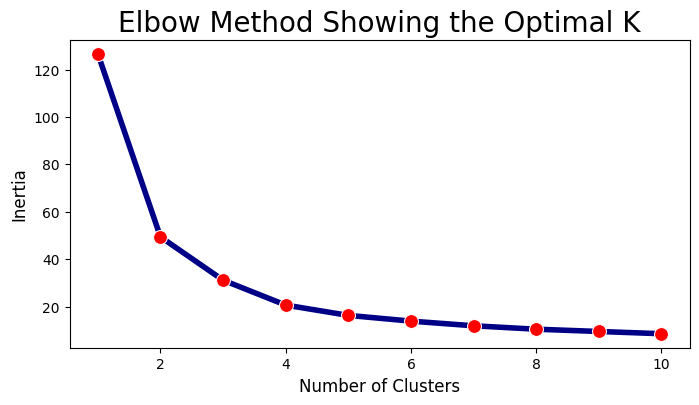

In [74]:
plt.figure(figsize=(8,4))

# plt.plot(inertia)
sns.lineplot(x=range(1,11), y=inertia, color='#000087',
             linewidth = 4, marker='o', markersize=10,
             markerfacecolor='red')

plt.xlabel('Number of Clusters', fontsize = 12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method Showing the Optimal K', fontsize=20)

**Review elbow method**

---

- The point where adding another cluster does not significantly lower the WCSS is known as the optimal number of clusters. 
- This point can be identified by spotting a sharp bend or elbow in the WCSS graph. 
- If this is the case, then adding more clusters does not enhance the clustering performance.

$$
\text{WCSS} = \sum_{j=1}^{k} \sum_{i=1}^{n} ||x_{(ij)} - c_{(j)}||^2
$$

where:
- n represents the total number of data points
- k represents the total number of clusters
- xi represents the ith data point
- cj represents the jth cluster centroid

**Elbow method analysis**

---

- The plot doesn't appear to show "sharp bending," and is instead roughly between "n_cluster 2" and "n_cluster 3."
- We should consider the business demands when determining the number of clusters needed rather than basing our decision just on the elbow technique.
- There are various disadvantages if we opt to cluster into two groups:
    - Inadequate granularity: When there are only two clusters, your client segmentation is extremely simplistic and lacks sufficient depth. This may make it challenging to successfully target particular customer segments.
    - Ineffective messaging: Insufficient segmentation may result in marketing communications that are too general and do not appeal to either cluster.
Because of this, we are considering using either "n_cluster" = 3 or "n_cluster" = 4, as long as our budget (based on the assumption in the RFM ranking algorithm above) can cover up to 5 clusters.
- Given that we are unable to view the "beding curve" for n_clusters 4 and 5, we can determine utilizing n_cluster 3.

- We choose to employ "n_cluster = 3" since, according to the elbow technique, there is no appreciable difference in the inertia reduction between "n_cluster = 4" and "n_cluster = 5."

## K-Means Clustering

In [76]:
# Fit for the best data
best_kmeans_cluster = KMeans(n_clusters=3,
                             random_state=42,
                             n_init=10) # Number of times the k-means algorithm will be run with different initial centroids

# Fit the model
best_kmeans_cluster.fit(df_clean_cluster)

KMeans(n_clusters=3, random_state=42)

In [77]:
# Prediction
label_data = best_kmeans_cluster.predict(df_clean_cluster)
label_data

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [78]:
# Generate the coordinate centroid
centroids = best_kmeans_cluster.cluster_centers_

In [80]:
# Create DataFrame
df_centroid = pd.DataFrame(centroids,
                           columns=['Recency', 'Frequency', 'Monetary']).rename_axis('Cluster', axis='index')

# Centroid DataFrame
df_centroid

,Recency,Frequency,Monetary
Cluster,,,
0,0.106557,0.259856,0.242853
1,0.505732,0.131910,0.118911
2,0.065655,0.685655,0.637335


### Analysis

In [82]:
# Inverse the transform data
cluster_df = pd.DataFrame(scaler.inverse_transform(clean_df))
cluster_df.index = clean_df.index
cluster_df.columns = clean_df.columns

# Create data
cluster_df = cluster_df[['Recency', 'Frequency', 'Monetary']]
cluster_df['label'] = label_data
cluster_df.head()

,Recency,Frequency,Monetary,label
Customer_ID,,,,
504316,25.0,9.0,496.821,1
504318,9.0,11.0,685.317,1
504320,17.0,9.0,878.577,1
504330,6.0,8.0,543.888,1
504333,14.0,11.0,903.100,1


In [83]:
# Calculate the average values for each RFM_Level and return size of each segment
cluster_df.groupby('label').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':'mean',
    'label':'count'
}).round(1)

,Recency,Frequency,Monetary,label
label,,,,
0,3.0,59.8,3483.8,305
1,14.2,33.8,1919.9,162
2,1.8,146.2,8461.5,266


- Cluster 0 --> Middle Customer
    - Characteristic : Low Recency, Medium Frequency, Medium Monetary
- Cluster 1 --> Highly Potential Churn
    - Characteristic : High Recency, Low Frequency, Low Monetary
- Cluster 2 --> Enthusiastic Customer
    - Characteristic : Low Recency, High Frequency, High Monetary

In [88]:
# Create function to assign the label
def assign_label(value):
    """
    Function to assign cluster label
    
    Parameters:
    ----------    
    value : int
        Number cluster

    Returns:
    --------
    label : str
        Label of cluster (Middle Customer, Highly Potential Churn, and Enthusiastic Customer)
    
    """
    if value == 0:
        return "Middle Customer"
    elif value == 1:
        return "Highly Potential Churn"
    else:
        return "Enthusiastic Customer"
# Create a column 'Customer_Type' based on 'K_Cluster' values
cluster_df["Customer_Type"] = cluster_df['label'].apply(assign_label)

# Check the result
cluster_df.head()

,Recency,Frequency,Monetary,label,Customer_Type
Customer_ID,,,,,
504316,25.0,9.0,496.821,1,Highly Potential Churn
504318,9.0,11.0,685.317,1,Highly Potential Churn
504320,17.0,9.0,878.577,1,Highly Potential Churn
504330,6.0,8.0,543.888,1,Highly Potential Churn
504333,14.0,11.0,903.100,1,Highly Potential Churn


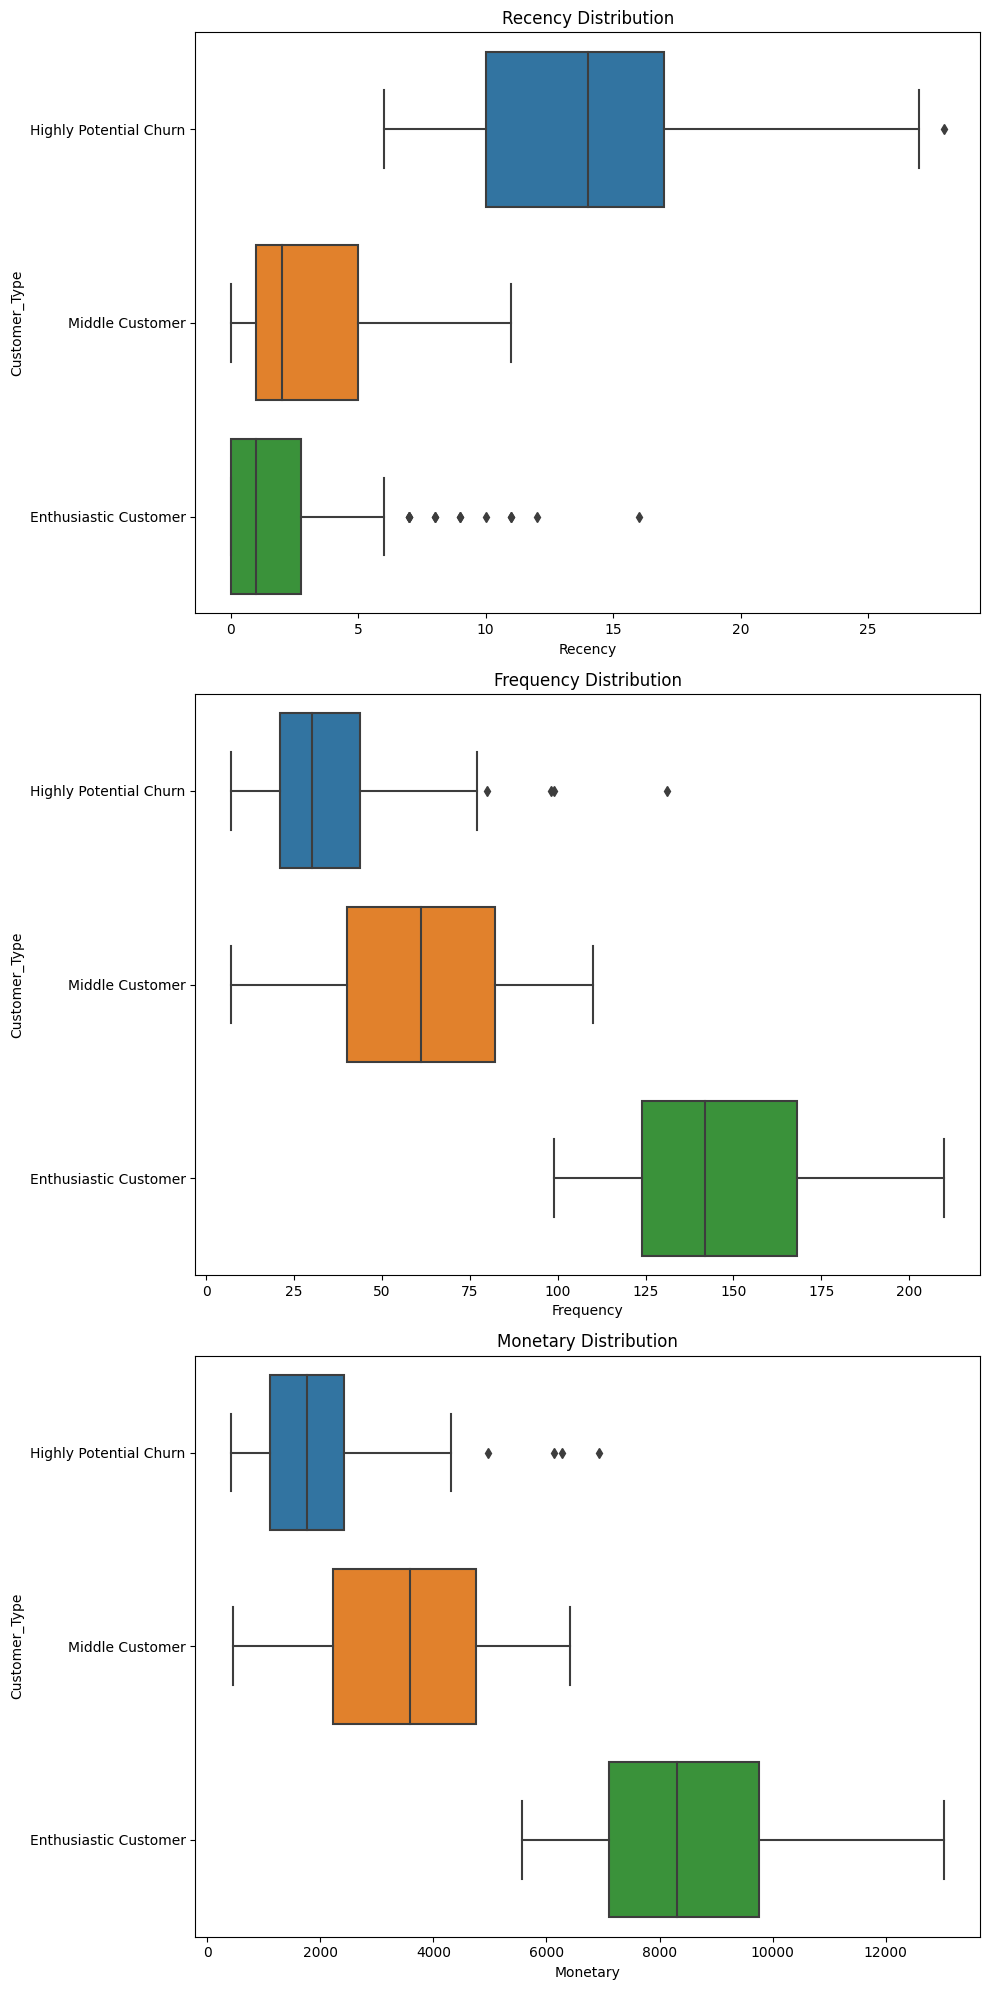

In [89]:
# Plot the boxplot
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,20))

# Iterate to all columns
for i, column in enumerate(['Recency', 'Frequency', 'Monetary']):
    sns.boxplot(data = cluster_df,
                y = 'Customer_Type',
                x = column,
                ax = axes[i])
    
    axes[i].set_title(f'{column} Distribution')

plt.tight_layout()
plt.show()

#### General Recommendation

**Enthusiastic Customer**

---

- General Characteristic (Low recency, high frequency & monetary)
  - Recency : 2 days
  - Frequency : 146 transactions
  - Monetary : \$ 8462

- General marketing initiatives:
  - Offer devoted account managers or individualized help to address their particular demands.
  - Provide tailored product suggestions based on their previous purchases.
  - Establish a customer loyalty program with tiers of prizes and special advantages.

**Middle Customers**

---

- General Characteristic (Low recency, medium frequency & monetary)
  - Recency : 3 days
  - Frequency : 60 transactions 
  - Monetary : \$ 3484


- General marketing initiatives:
  - Encourage people to sample your goods or services by providing them with free trials, demos, or introductory discounts.

**Highly Potential Churn**

---

- General Characteristic (high recency, low frequency & monetary)
  - Recency : 14 days
  - Frequency : 34 transactions
  - Monetary : \$ 1920


- General Marketing initiative:
  - Implement a proactive customer outreach program to answer any complaints or issues they may have. 
  - Conduct surveys or feedback campaigns to better understand their wants and preferences. 
  - Use discount promotional campaigns to entice them to make a purchase.

## In-Depth Analysis and Recommendation

- We wish to analyze the RFM data in a more focused manner.
- Before making any precise recommendations, we wish to undertake an analysis and take into account a variety of factors, such as short-term and long-term games.
- based on the analysis, choose appropriate business advice and undertake marketing strategies.

In [90]:
# Use inverse scaling to the clean_data
clean_df_ori = pd.DataFrame(scaler.inverse_transform(clean_df))

# Replace original index to new dataframe
clean_df_ori.index = clean_df.index

# Replace original column names to new dataframe
clean_df_ori.columns = clean_df.columns


In [91]:
# Print the clean data
clean_df_ori.head()

,Recency,Frequency,Monetary
Customer_ID,,,
504316,25.0,9.0,496.821
504318,9.0,11.0,685.317
504320,17.0,9.0,878.577
504330,6.0,8.0,543.888
504333,14.0,11.0,903.100


## In-Depth Analysis

- We want to know how most customers purchase behavior
- We want to make foundation for specific recommendation based on specific condition and segment

In [92]:
# Show description statistics
clean_df_ori.describe()

,Recency,Frequency,Monetary
count,733.000000,733.000000,733.000000
mean,5.038199,85.377899,4944.521000
std,5.841828,53.359748,3102.858155
min,0.000000,7.000000,419.437000
25%,1.000000,39.000000,2203.387000
50%,3.000000,77.000000,4443.646000
75%,7.000000,128.000000,7399.816000
max,28.000000,210.000000,13037.662000


Text(0.5, 1.0, 'Recency Distribution')

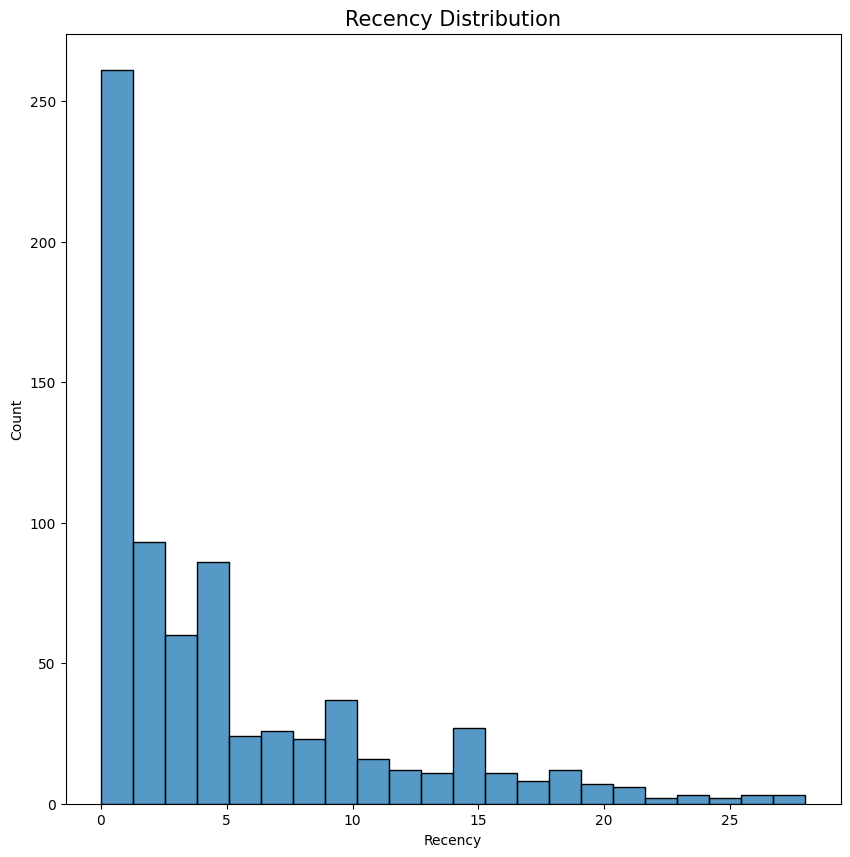

In [93]:
# Plot recency
plt.figure(figsize=(10,10))
sns.histplot(clean_df_ori['Recency'])
plt.title('Recency Distribution', fontsize=15)

- The majority of customers shop recently
- The highest count is customers who shop less than 5 days ago
- It good for the business, low recency customers are more likely to make transaction when we give them marketing initiative

Text(0.5, 1.0, 'Monetary Distribution')

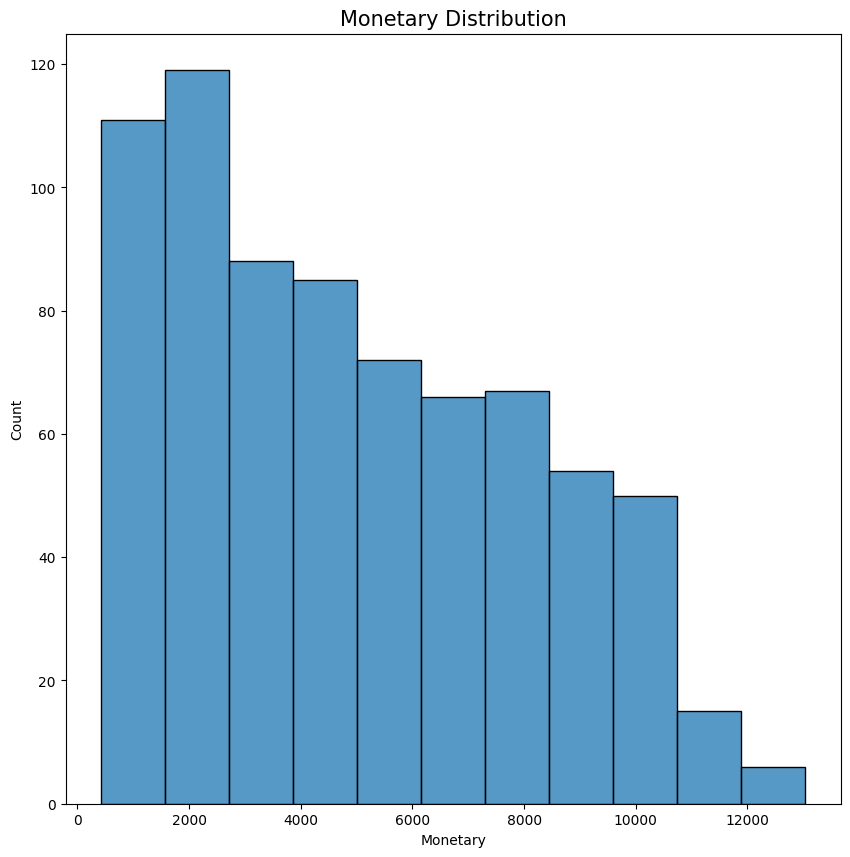

In [94]:
# Plot monetary
plt.figure(figsize=(10,10))
sns.histplot(clean_df_ori['Monetary'])
plt.title('Monetary Distribution', fontsize=15)


- The average consumer spends between $419 and $7400 (min - quantile 0.75).
- It's rather expensive for a one-year purchase.

Text(0.5, 1.0, 'Frequency Distribution')

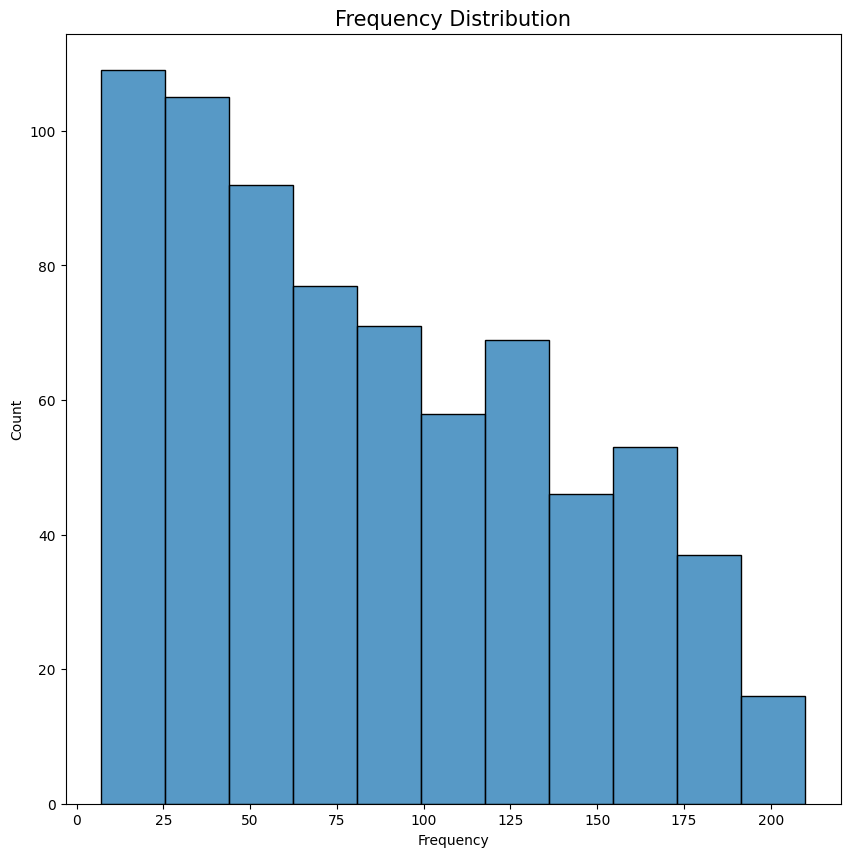

In [95]:
# Plot monetary
plt.figure(figsize=(10,10))
sns.histplot(clean_df_ori['Frequency'])
plt.title('Frequency Distribution', fontsize=15)

- Most customers spend around 7 - 128 times
- It's relatively very high for 1 year transaction

**RFM with true values**

In [96]:
# Print clustered data
cluster_df.head()

,Recency,Frequency,Monetary,label,Customer_Type
Customer_ID,,,,,
504316,25.0,9.0,496.821,1,Highly Potential Churn
504318,9.0,11.0,685.317,1,Highly Potential Churn
504320,17.0,9.0,878.577,1,Highly Potential Churn
504330,6.0,8.0,543.888,1,Highly Potential Churn
504333,14.0,11.0,903.100,1,Highly Potential Churn


In [97]:
# Calculate average value of all RFM_Level for each segment
rfm_agg = cluster_df.groupby('Customer_Type').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':'mean',
    'label':'count'
}).round(1)

# Change name column
rfm_agg.columns = ['Recency', 'Frequency', 'Monetary', 'Count Customers']

In [98]:
# Print data
rfm_agg

,Recency,Frequency,Monetary,Count Customers
Customer_Type,,,,
Enthusiastic Customer,1.8,146.2,8461.5,266
Highly Potential Churn,14.2,33.8,1919.9,162
Middle Customer,3.0,59.8,3483.8,305


Using the mean value, we were able to determine each customer's characteristics. Enthusiastic Customers provide the highest average income per segment, but Middle Customers make up the majority of our clientele.

In [99]:
# Calculate the revenue percentage per segmentss
rfm_agg['percentage revenue'] = np.round(rfm_agg['Monetary']*rfm_agg['Count Customers']/(rfm_agg['Monetary']*rfm_agg['Count Customers']).sum()*100,2)

# Print the data
rfm_agg

,Recency,Frequency,Monetary,Count Customers,percentage revenue
Customer_Type,,,,,
Enthusiastic Customer,1.8,146.2,8461.5,266,62.10
Highly Potential Churn,14.2,33.8,1919.9,162,8.58
Middle Customer,3.0,59.8,3483.8,305,29.32


The Enthusiastic Customer category generates the majority of our revenue. **In short term**, we can concentrate on giving marketing effort to **Enthusiastic & Middle Customers** with a variety of promotion: We need to retail all of our customers, for instance by discounts, upselling, and cross-selling. Simply said, we should be aware of the reasons why customers leave or remain with our business, provide them loyalty programs tailored to their needs, and engage possible churn customers in discount promotions.

<br>

We'll provide precise advice for this situation.

In this analysis, we want to know
- the average price every segment in raw data
- the average quanity order each segment in raw data

In [100]:
# Create the copy of cluster_df
customer_segmentation = cluster_df.copy().reset_index()

# Use customer id and customer type
customer_segmentation = customer_segmentation[['Customer_ID', 'Customer_Type']]

# Print data
customer_segmentation.head()

,Customer_ID,Customer_Type
0,504316,Highly Potential Churn
1,504318,Highly Potential Churn
2,504320,Highly Potential Churn
3,504330,Highly Potential Churn
4,504333,Highly Potential Churn


In [101]:
# Create the copy of data
df_trx = retail_df.copy()

# Drop missing values
df_trx = df_trx.dropna()

# Typecasting Customer_ID as int
df_trx['Customer_ID'] = df_trx['Customer_ID'].astype(int)

# Print the data
df_trx.head()

,Customer_ID,Invoice,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
86,504309,489634,18,Female,20.9,6,2021-04-22,18.183,Cards,271,Chrome,Not Subsribed,Not Used
87,504309,489635,62,Female,24.3,2,2021-10-27,16.524,Cards,168,Others,Not Subsribed,Used
88,504311,489636,17,Female,28.0,6,2021-11-29,22.680,Digital Wallets,269,Chrome,Not Subsribed,Not Used
89,504315,489637,21,Male,6.8,1,2021-09-02,6.800,Cards,932,Chrome,Not Subsribed,Not Used
90,504316,489638,26,Female,5.1,6,2021-10-25,3.723,Paypal,1005,Chrome,Not Subsribed,Used


In [102]:
# Check missing values
df_trx.isna().sum()

Customer_ID       0
Invoice           0
Age               0
Gender            0
Revenue_Total     0
N_Purchases       0
Purchase_DATE     0
Purchase_VALUE    0
Pay_Method        0
Time_Spent        0
Browser           0
Newsletter        0
Voucher           0
dtype: int64

In [103]:
# Merge df_trx with customer_segmentation on customer_id column
df_trx = df_trx.merge(customer_segmentation[['Customer_ID', 'Customer_Type']], on='Customer_ID', how='left')

In [105]:
# Do sanity check
df_trx.head()

,Customer_ID,Invoice,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Customer_Type
0,504309,489634,18,Female,20.9,6,2021-04-22,18.183,Cards,271,Chrome,Not Subsribed,Not Used,NaN
1,504309,489635,62,Female,24.3,2,2021-10-27,16.524,Cards,168,Others,Not Subsribed,Used,NaN
2,504311,489636,17,Female,28.0,6,2021-11-29,22.680,Digital Wallets,269,Chrome,Not Subsribed,Not Used,NaN
3,504315,489637,21,Male,6.8,1,2021-09-02,6.800,Cards,932,Chrome,Not Subsribed,Not Used,NaN
4,504316,489638,26,Female,5.1,6,2021-10-25,3.723,Paypal,1005,Chrome,Not Subsribed,Used,Highly Potential Churn


In [106]:
# Check the missing value location
df_trx[df_trx['Customer_Type'].isna()].sample(5, random_state=41)

,Customer_ID,Invoice,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Customer_Type
134,504446,489768,29,Female,9.1,7,2021-09-21,4.368,Cards,767,Chrome,Not Subsribed,Not Used,NaN
14977,504308,504922,63,Female,37.4,4,2021-03-24,22.066,Paypal,601,Chrome,Not Subsribed,Not Used,NaN
5542,505188,495288,17,Female,56.5,5,2021-10-27,55.935,Others,806,Safari,Not Subsribed,Not Used,NaN
10591,504452,500536,25,Female,18.8,5,2021-04-12,18.424,Digital Wallets,565,Chrome,Not Subsribed,Not Used,NaN
5426,505188,495172,52,Male,17.2,6,2021-04-30,5.848,Cards,534,Chrome,Subsribed,Used,NaN


In [107]:
# Aggregate by Customer_Type
grouped_segmentation = df_trx.groupby('Customer_Type').agg({'Purchase_VALUE':['min','mean','max'],
                                                       'N_Purchases':['min','mean','max']})

# show the data
grouped_segmentation

Purchase_VALUE                  N_Purchases            \
                                  min       mean   max         min      mean   
Customer_Type                                                                  
Enthusiastic Customer           0.005  15.930096  59.9           1  4.002186   
Highly Potential Churn          0.015  15.889208  59.9           1  3.962171   
Middle Customer                 0.011  16.095053  59.9           1  3.973935   

                            
                       max  
Customer_Type               
Enthusiastic Customer    7  
Highly Potential Churn   7  
Middle Customer          7

Although the average price and quantity aren't significantly different, we can't set specific price/quantity-based promotions (such as buy three get one free) for each segment because the best customers typically purchase with higher quantities and higher prices.
- We are only able to select the price/quantity promotion's upper limit.
- Average clients order more quantity but prefer slightly lower prices than at-risk customers (see the maximum price and maximum quantity).


We can make recommendations using this knowledge.

## **Recommendation for Short Term Game**

In order to enhance revenue and retention rates in the short term, we must treat our section in accordance with their profiles.

**Enthusiastic Customer**
- They are extremely valuable to the company, so maintaining their loyalty is essential. 
- They respond favorably to customized marketing initiatives and prefer exclusive prizes or bonuses.
- Pay special attention to this market segment, as it accounts for more than 50% of our total sales.


we can create strategies, such as:
- Provide individualized product recommendations based on their purchase history. 
- Send personalized thank-you cards or special incentives to demonstrate appreciation for their ongoing support.
- Offer a loyalty program with tiers of advantages and exclusive rewards for top-tier consumers.
- Start focused cross-selling or upselling activities to boost their average order value.
- Create marketing plans for at least **266 person**.
- You can set promotions to run every 2 to 3 days (because, according to the histogram, the majority of your customers make purchases every 2 days) or every months


**Middle Customers**
- This market comprises consumers who place frequent orders with modest order values. 
- They display a moderate level of loyalty. This segment is the second generator of revenue generation. 
- Because they account for > 93% of your revenue, you should focus your marketing efforts in the near future.

We can treat them by:
- Creating limited-time promos or incentives to create urgency and promote more purchases.
- Creating product packages or bundles to raise the average order value
- Because they are often more price sensitive than Highly Potential Churn clients, offer them bundles of products every 3 to 4 days and price promotions.

**Highly Potential Churn**
- Customers who have decreased their engagement or purchasing activity are included in this segment. 
- They may have made fewer purchases or orders with lower values. 
- Because this segment only contributes 5% of total revenue, you don't need to focus on it right away. Instead, think about your marketing budget.

We can give them marketing initiative to prevent from churning:

- But if you have enough money, you can stop them from leaving.
- They prefer to purchase more expensive products compared to other customer segments, but Highly Potential Churn segments also enjoy discount promotions. 
- They implement triggered email campaigns to re-engage them based on specific customer actions or inactivity. 
- They gather feedback from customers or conduct customer surveys. 
- They provide individualized customer support or assistance.

## **Recommendation for Long Term Game**
These tactics can be used by businesses if they want to apply marketing strategies over a longer period of time:

**Enthusiastic Customer**
- Organize exclusive events or experiences for top-tier customers to strengthen their emotional connection with the brand. 
- These 2 strategies will have an impact on increasing their customer lifetime values. 
- Create a customer advocacy program where devoted customers can become brand ambassadors and refer new customers.
- In the long run, it's crucial to create loyalty programs based on segments. 
- In this section, you can assign the label **platinum** loyalty programs. 
- Offer benefit free shipping if they can keep completing transactions with us once every 3 days (most customer recency is 2 to 3 days based on histogram).

**Middle Customers**
- To keep them "alive" for transactions, send targeted emails or newsletters on a frequent basis with valuable material.
- Offer them a loyalty program for the **Gold** tier. 
- You can provide them a lot of benefits if they continue doing business with us every 5 days (at the very least). 
- You can also put short-term recommendations into effect to keep them doing business.


**Highly Potential Churn**
- Implement a program to keep clients by providing them with ongoing prizes and perks (such as a loyalty program for customers who are at risk).
- Communicate with them on a regular basis through direct mail, social media engagement, or targeted email marketing.
- Offer them the **Sliver** loyalty program, which has various benefits (like free shipping) if they continue doing business with us once (minimum) every three weeks.

## Conclusion /  Future Works
-	From analysis above, we use two approach to generate cluster of customer segmentation using RFM Analysis.
-	With Binning Method, we devide the cluster into 5 category as follows:
a.	Dissatisfied Customers
b.	Sporadic Shoppers
c.	Deal-Driven Shoppers
d.	Loyal Consumers
e.	Enthusiastic Shoppers
-	With K-Means and Elbow Methods, we conclude that there are 3 segmented category as follows:
a.	Enthusiastic Customer
b.	Middle Customer
c.	Highly Potential Churn
-	To get better understanding of customer behavior and better prediction of customer value, we can user CLV analysis to determine value that can generated by customer per lifetime value.
